In [1]:
import pandas as pd
housing = pd.read_csv("housing.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN\xa0'}>,
        <AxesSubplot:title={'center':'INDUS\xa0'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM\xa0'}>,
        <AxesSubplot:title={'center':'AGE\xa0'}>,
        <AxesSubplot:title={'center':'DIS\xa0'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B\xa0\xa0'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

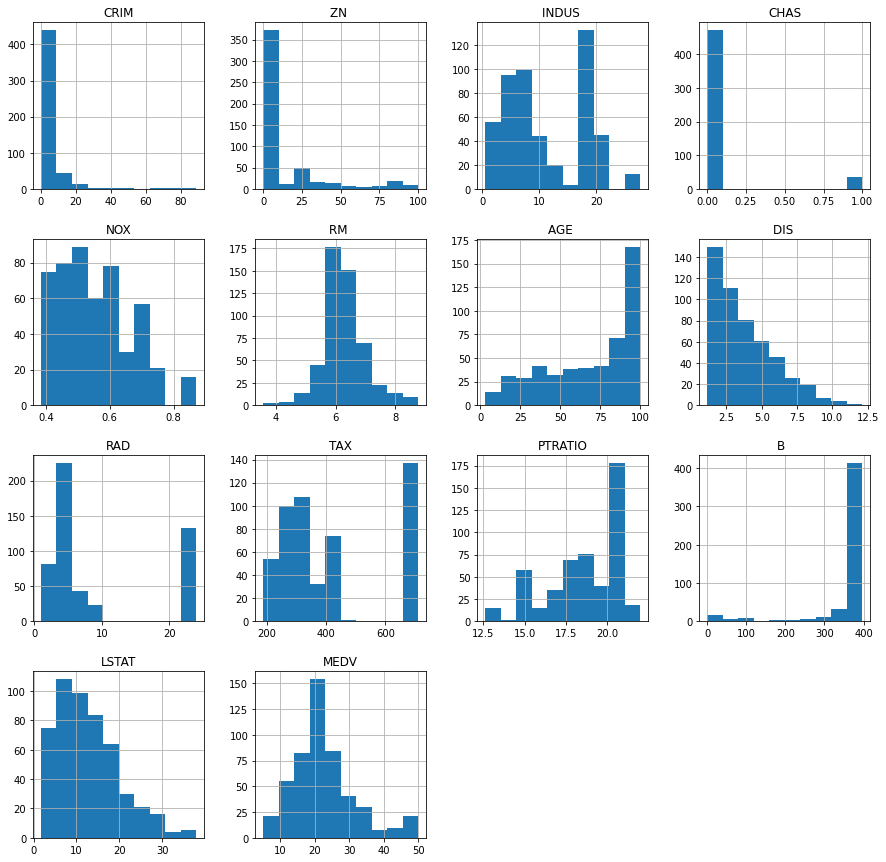

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=10, figsize=(15,15))

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.8, random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}")

Rows in train set:101
Rows in test set:405


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
    

In [5]:
strat_train_set.value_counts()

CRIM      ZN    INDUS   CHAS  NOX    RM     AGE   DIS     RAD  TAX  PTRATIO  B       LSTAT  MEDV
0.00632   18.0  2.31    0     0.538  6.575  65.2  4.0900  1    296  15.3     396.90  4.98   24.0    1
0.80271   0.0   8.14    0     0.538  5.456  36.6  3.7965  4    307  21.0     288.99  11.69  20.2    1
3.69311   0.0   18.10   0     0.713  6.376  88.4  2.5671  24   666  20.2     391.43  14.65  17.7    1
2.73397   0.0   19.58   0     0.871  5.597  94.9  1.5257  5    403  14.7     351.85  21.45  15.4    1
2.24236   0.0   19.58   0     0.605  5.854  91.8  2.4220  5    403  14.7     395.11  11.64  22.7    1
                                                                                                   ..
0.11132   0.0   27.74   0     0.609  5.983  83.5  2.1099  4    711  20.1     396.90  13.35  20.1    1
0.10153   0.0   12.83   0     0.437  6.279  74.5  4.0522  5    398  18.7     373.66  11.97  20.0    1
0.09849   0.0   25.65   0     0.581  5.879  95.8  2.0063  2    188  19.1     379.38  17

In [6]:
strat_test_set.value_counts()

CRIM      ZN    INDUS   CHAS  NOX    RM     AGE    DIS      RAD  TAX  PTRATIO  B       LSTAT  MEDV
0.00906   90.0  2.97    0     0.400  7.088  20.8   7.3073   1    285  15.3     394.72  7.85   32.2    1
1.05393   0.0   8.14    0     0.538  5.935  29.3   4.4986   4    307  21.0     386.85  6.58   23.1    1
1.49632   0.0   19.58   0     0.871  5.404  100.0  1.5916   5    403  14.7     341.60  13.28  19.6    1
1.46336   0.0   19.58   0     0.605  7.489  90.8   1.9709   5    403  14.7     374.43  1.73   50.0    1
1.41385   0.0   19.58   1     0.871  6.129  96.0   1.7494   5    403  14.7     321.02  15.12  17.0    1
                                                                                                     ..
0.10959   0.0   11.93   0     0.573  6.794  89.3   2.3889   1    273  21.0     393.45  6.48   22.0    1
0.10793   0.0   8.56    0     0.520  6.195  54.4   2.7778   5    384  20.9     393.49  13.00  21.7    1
0.10659   80.0  1.91    0     0.413  5.936  19.5   10.5857  4    334 

In [7]:
#correlation:


In [8]:
corr_matrix = housing.corr()

In [9]:
corr_matrix["CHAS"].sort_values(ascending=False)

CHAS       1.000000
MEDV       0.175260
RM         0.091251
NOX        0.091203
AGE        0.086518
INDUS      0.062938
B          0.048788
RAD       -0.007368
TAX       -0.035587
ZN        -0.042697
LSTAT     -0.053929
CRIM      -0.055892
DIS       -0.099176
PTRATIO   -0.121515
Name: CHAS, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RAD', ylabel='MEDV'>,
        <AxesSubplot:xlabel='TAX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='CHAS', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RAD'>,
        <AxesSubplot:xlabel='RAD', ylabel='RAD'>,
        <AxesSubplot:xlabel='TAX', ylabel='RAD'>,
        <AxesSubplot:xlabel='CHAS', ylabel='RAD'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='TAX'>,
        <AxesSubplot:xlabel='RAD', ylabel='TAX'>,
        <AxesSubplot:xlabel='TAX', ylabel='TAX'>,
        <AxesSubplot:xlabel='CHAS', ylabel='TAX'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='CHAS'>,
        <AxesSubplot:xlabel='RAD', ylabel='CHAS'>,
        <AxesSubplot:xlabel='TAX', ylabel='CHAS'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CHAS'>]], dtype=object)

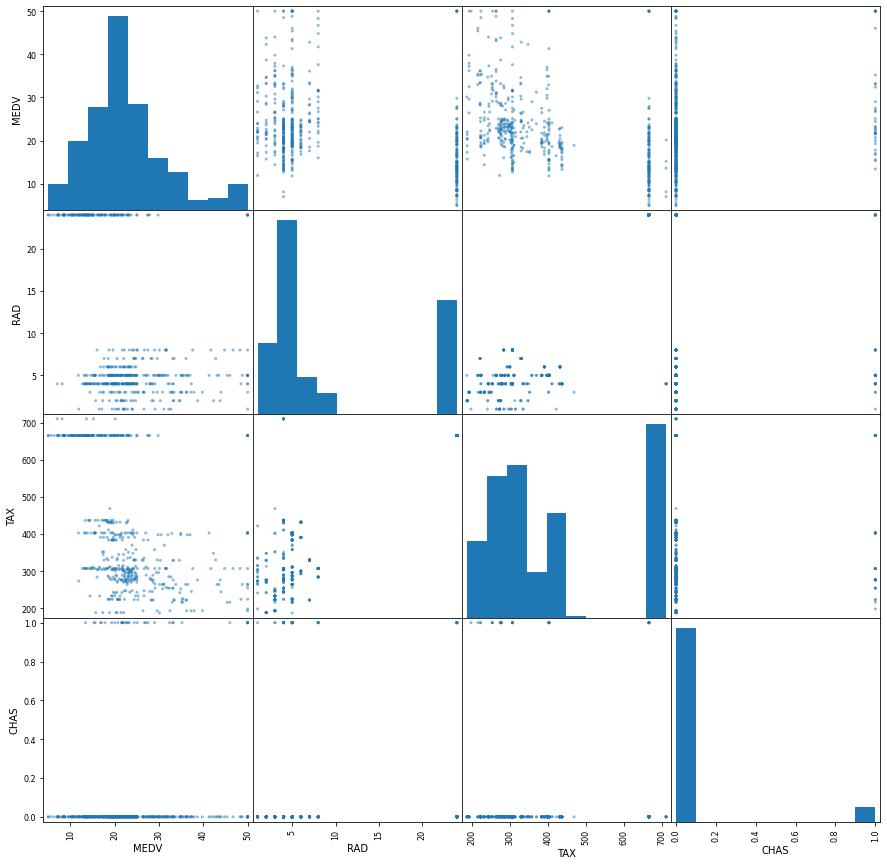

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RAD", "TAX", "CHAS"]
scatter_matrix(housing[attributes], figsize=(15,15))

In [11]:
#comparing attributes:

In [12]:
housing["RADTAX"] = (housing["RAD"]/housing["TAX"])

In [13]:
housing["RADTAX"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: RADTAX
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [14]:
housing["RADTAX"].describe()

count    506.000000
mean       0.020124
std        0.010665
min        0.002370
25%        0.012563
50%        0.015717
75%        0.036036
max        0.036036
Name: RADTAX, dtype: float64

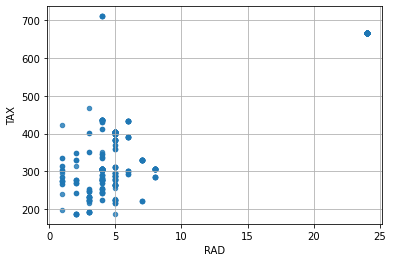

In [15]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="RAD", y="TAX", alpha=0.8)
plt.grid()

In [16]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [17]:
#missing attributes:

In [18]:
housing.dropna(subset="RAD")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59
325,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287,19.6,393.68,5.08
419,11.81230,0.0,18.10,0,0.718,6.824,76.5,1.7940,24,666,20.2,48.45,22.74
249,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330,19.1,393.74,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264,13.0,384.54,7.44
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27
137,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59
258,0.66351,20.0,3.97,0,0.647,7.333,100.0,1.8946,5,264,13.0,383.29,7.79


In [19]:
housing.drop("RAD", axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,226,17.9,395.93,4.81
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,403,14.7,363.43,4.59
325,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,287,19.6,393.68,5.08
419,11.81230,0.0,18.10,0,0.718,6.824,76.5,1.7940,666,20.2,48.45,22.74
249,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,330,19.1,393.74,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,264,13.0,384.54,7.44
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,666,20.2,109.85,23.27
137,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,437,21.2,394.08,14.59
258,0.66351,20.0,3.97,0,0.647,7.333,100.0,1.8946,264,13.0,383.29,7.79


In [20]:
median = housing["RAD"].median()
housing["RAD"].fillna(median)

55      5
157     5
325     5
419    24
249     7
       ..
267     5
435    24
137     4
258     5
131     4
Name: RAD, Length: 101, dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy="median")
impute.fit(housing)

SimpleImputer(strategy='median')

In [22]:
impute.statistics_

array([2.9090e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 5.3800e-01,
       6.2510e+00, 7.4500e+01, 3.2157e+00, 5.0000e+00, 3.8400e+02,
       1.9200e+01, 3.9030e+02, 1.0300e+01])

In [23]:
X = impute.transform(housing)

In [24]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [25]:
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
1,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
2,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
3,11.81230,0.0,18.10,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74
4,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44
97,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27
98,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59
99,0.66351,20.0,3.97,0.0,0.647,7.333,100.0,1.8946,5.0,264.0,13.0,383.29,7.79


In [26]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    float64
 4   NOX      101 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    float64
 9   TAX      101 non-null    float64
 10  PTRATIO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
dtypes: float64(13)
memory usage: 10.4 KB


In [27]:
#creating pipeline:

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('std_values', StandardScaler()),
])

In [29]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [30]:
housing_num_tr

array([[-0.57352322,  3.76256138, -1.55064017, ..., -0.36973903,
         0.44371033, -1.07432019],
       [-0.32986506, -0.45102528,  1.14981541, ..., -1.91167007,
         0.05464046, -1.10666494],
       [-0.53754224, -0.45102528, -0.64460496, ...,  0.44941183,
         0.41677472, -1.03462436],
       ...,
       [-0.50524088, -0.45102528,  1.48957862, ...,  1.22037735,
         0.42156327,  0.3635509 ],
       [-0.44260278,  0.48532731, -1.14616017, ..., -2.73082093,
         0.29239208, -0.63619587],
       [-0.33603265, -0.45102528,  1.48957862, ...,  1.22037735,
         0.45532256,  0.02099061]])

In [31]:
housing_num_tr.shape

(101, 13)

In [32]:
#evaluating the model:


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [34]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]


In [35]:
prepared_data = my_pipeline.transform(some_data)

In [36]:
model.predict(prepared_data)

array([37.009, 36.942, 24.423, 10.694, 26.231])

In [37]:
list[some_labels]

list[55     35.4
157    41.3
325    24.6
419     8.4
249    26.2
Name: MEDV, dtype: float64]

In [38]:
#model testing:

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [40]:
rmse

1.6074696153758008

In [41]:
#cross - validation:

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)

In [43]:
rmse_score

array([3.94828856, 3.86640789, 5.76512619, 3.10607452, 9.47978256,
       3.0048068 , 3.71291112, 3.27004763, 3.07666038, 3.74729667])

In [46]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [45]:
print_scores(rmse_score)

scores: [3.94828856 3.86640789 5.76512619 3.10607452 9.47978256 3.0048068
 3.71291112 3.27004763 3.07666038 3.74729667]
mean: <built-in method mean of numpy.ndarray object at 0x7f97c448fe70>
standard deviation: <built-in method std of numpy.ndarray object at 0x7f97c448fe70>


In [47]:
#saving the model:


In [49]:
from joblib import dump, load
dump(model, 'house_project.joblib')

['house_project.joblib']

In [50]:
#testing the model on test data:

In [61]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list( Y_test))

[19.081 19.92  19.754 19.785 22.246 23.364 14.091 15.098 24.462 11.007
 19.922 10.902 11.596 13.478 24.582  9.155 42.844 21.452 14.608 17.161
 22.449  9.814 13.594  9.611 12.484 18.581 18.495 14.302 21.542 16.63
 20.899 33.02  39.867 25.325 18.926 25.109 26.559 14.383 19.385  9.111
 22.295 38.364 24.781 10.546 42.719 19.422 21.915 41.422 21.783 20.759
 23.995 19.749 23.539 28.963 23.061 26.455 20.275  8.463 23.077 21.34
 28.928 19.473 21.655 19.664 20.015 38.727  7.739 39.773 13.958 20.122
 24.706 18.171 25.285 20.928 41.556 14.738 23.92  13.754 23.522 43.52
 37.478 36.882 11.793 18.927 14.757 30.287 14.172 31.593 11.065 29.172
 32.052 28.267 10.724 12.051 25.211 10.975 38.179 19.846 14.157 18.475
 12.465 24.318 24.542 34.875 17.845 24.279 19.083 20.639 22.952 10.957
 19.337 11.386 13.992 20.431 21.174 18.719 17.635 26.166 20.221 19.652
 17.342 33.162 18.588 19.281 20.88  22.986 23.655 22.366 20.196 23.797
 25.329 43.243 24.792 23.645 23.614 20.714 21.512 24.441 19.778 20.61
 22.356 19

In [62]:
final_rmse

3.971011431939297